#**Install Requirement Library**

In [2]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 36.1 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3853 sha256=a5bf2c6bee5911b92843d21f9e48fc76cb539c2188a897489fdc220dc89070cd
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [3]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [4]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1973-2022.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-03T02:03:13.887Z,27.7781,57.4801,10.0,4.1,mb,39.0,85.0,3.045,0.51,...,2023-01-12T23:11:06.040Z,"81 km NNE of M?n?b, Iran",earthquake,7.40,1.883,0.112,22.0,reviewed,us,us
1,2022-11-02T08:07:03.814Z,26.3522,54.8717,10.0,4.1,mb,31.0,114.0,1.846,0.91,...,2023-01-12T23:11:36.040Z,southern Iran,earthquake,6.24,1.868,0.158,11.0,reviewed,us,us
2,2022-10-31T16:08:38.061Z,25.9532,60.3815,10.0,4.1,mb,20.0,136.0,3.907,0.88,...,2023-01-12T23:11:28.040Z,"34 km SSE of N?kshahr, Iran",earthquake,7.70,1.913,0.175,10.0,reviewed,us,us
3,2022-10-30T00:49:05.189Z,27.3165,55.6221,10.0,4.0,mb,36.0,122.0,2.419,0.82,...,2023-01-12T23:11:16.040Z,"66 km WNW of Bandar Abbas, Iran",earthquake,7.33,1.730,0.105,24.0,reviewed,us,us
4,2022-10-24T11:21:08.588Z,26.8864,55.3557,10.0,4.3,mb,36.0,93.0,2.079,0.38,...,2023-01-03T15:23:45.040Z,"59 km NE of Bandar-e Lengeh, Iran",earthquake,9.87,1.935,0.111,23.0,reviewed,us,us


#**Gambaran Secara Statistik Kejadian Gempa**

In [5]:
# Total kejadian gempa
N_tot = df['mag'].count()
print('Total Kejadian Gempa sejak **1973 hingga 2022**', N_tot)
print('Rata-rata jumlah kejadian per pekan:', round(N_tot/(52*(2022-1973+1)),2) )
print('Rata-rata jumlah kejadian per tahun:', round(N_tot/((2022-1973+1)),2) )

# Daftar Kejadian gempa terbesar
print('Manitudo gempa terbesar:')
df[['mag','time','place']].sort_values('mag',ascending=False).head(5)

Total Kejadian Gempa sejak **1973 hingga 2022** 7897
Rata-rata jumlah kejadian per pekan: 3.04
Rata-rata jumlah kejadian per tahun: 157.94
Manitudo gempa terbesar:


,mag,time,place
2237,7.7,2013-04-16T10:44:20.180Z,"79 km ESE of Kh?sh, Iran"
7448,7.4,1978-09-16T15:35:56.600Z,"52 km ESE of Tabas, Iran"
6343,7.4,1990-06-20T21:00:09.980Z,"23 km N of P?deg?n-e Manj?l, Iran"
5424,7.3,1997-05-10T07:57:29.720Z,"58 km E of Q?’en, Iran"
1288,7.3,2017-11-12T18:18:17.180Z,"29 km S of ?alabja, Iraq"


In [7]:
#Object Date Time
df['dt_time'] = df['time'].apply(lambda x:
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Column year, month, and day
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
df['dofy'] = df['dofy'].astype(str).astype(int)

df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

# Menghitung jumlah kejadian gempa per waktu (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Menghitung rata-rata kejadian gempa per waktu (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

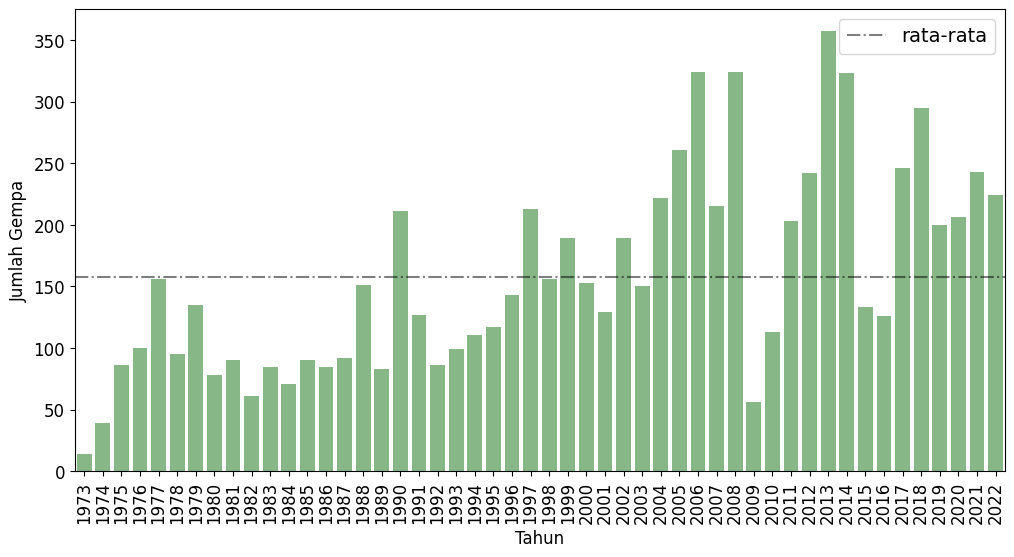

In [8]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('Jumlah Gempa')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


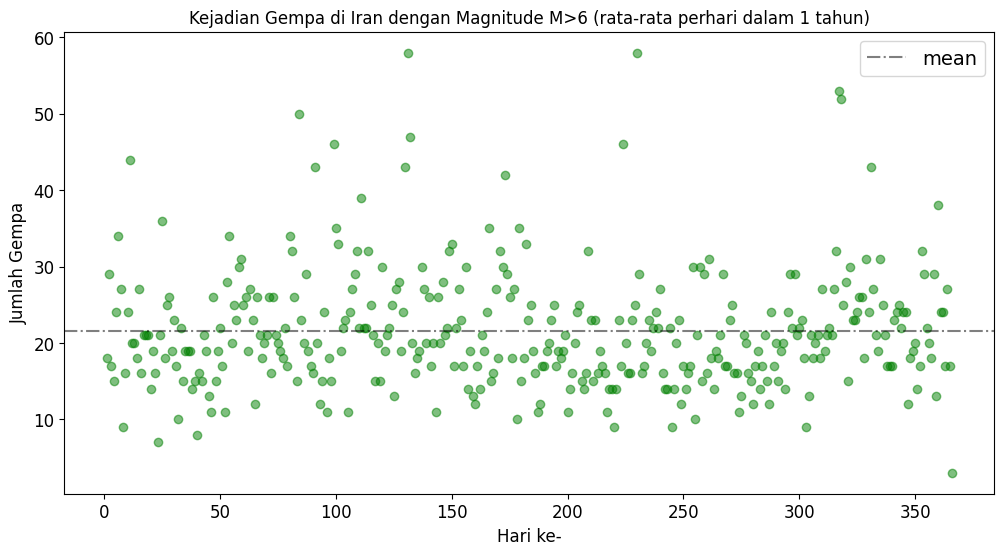

In [10]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Jumlah Gempa'), plt.xlabel('Hari ke-')
plt.title('Kejadian Gempa di Iran dengan Magnitude M>6 (rata-rata perhari dalam 1 tahun)')
plt.legend()
plt.show()

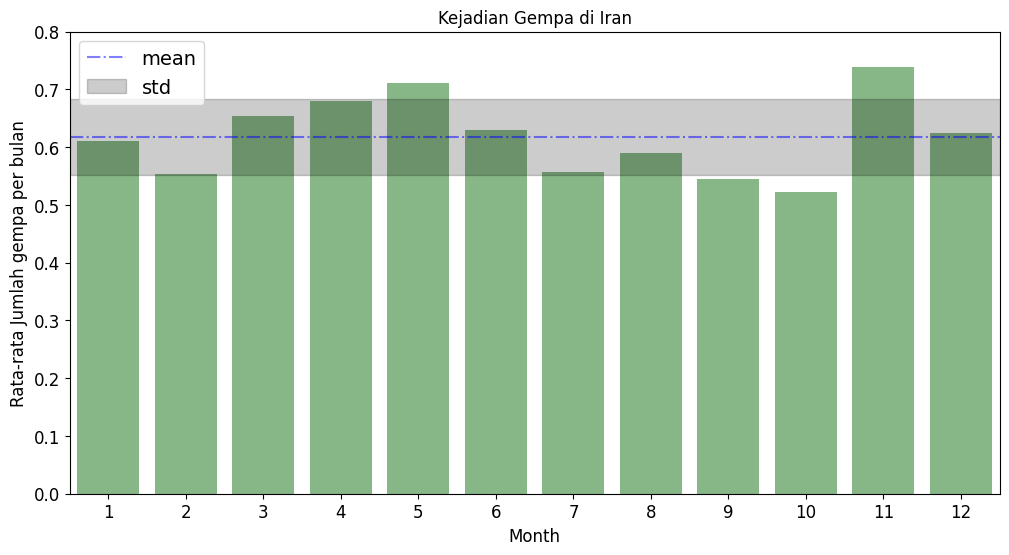

In [11]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 0.8])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Rata-rata Jumlah gempa per bulan'), plt.xlabel('Month')
plt.title('Kejadian Gempa di Iran')
plt.legend()
plt.show()

#**Visualisasi Lokasi Gempa**